In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, classification_report, ConfusionMatrixDisplay, roc_auc_score

import tensorflow as tf
from keras import Sequential, metrics
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
data = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRHS1SFwExRvsWUREyqCHY0Oj_GrdEYHAD16sCwySK8N-OS1d8dlHQNtZbe2VOYVrJsES0HiQC5EPA1/pub?gid=1197989481&single=true&output=csv'
df = pd.read_csv(data)
df

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
0,26,3,2062,2,3,3,3,2,2,2,...,3,3,3,2,0,0,0,1,1,0
1,52,3,680,5,5,5,5,3,4,4,...,4,4,4,4,18,2,0,1,1,1
2,28,1,188,3,5,3,4,3,3,3,...,4,4,5,3,0,0,1,1,0,0
3,54,3,453,3,5,5,5,3,4,4,...,3,4,3,1,91,80,0,1,1,0
4,40,1,775,4,3,3,3,4,4,4,...,3,3,3,4,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,10,2,820,5,3,2,2,5,5,4,...,4,5,5,5,0,0,0,1,1,1
19996,27,3,2676,4,3,3,3,4,4,4,...,3,1,4,4,0,0,0,1,1,0
19997,39,1,197,2,5,2,1,4,2,4,...,4,3,5,4,25,18,1,1,0,0
19998,17,3,3340,2,5,5,5,2,2,2,...,4,2,3,2,2,0,0,1,1,0


Gender_Male, Loyal Customer, Business Travel, and satisfied columns are nominal, but they are all binary so one hot encoding is not necessary. Other categorical columns are ordinal.

In [13]:
df.dtypes

Age                                  int64
Class                                int64
Flight Distance                      int64
Inflight wifi service                int64
Departure/Arrival time convenient    int64
Ease of Online booking               int64
Gate location                        int64
Food and drink                       int64
Online boarding                      int64
Seat comfort                         int64
Inflight entertainment               int64
On-board service                     int64
Leg room service                     int64
Baggage handling                     int64
Checkin service                      int64
Inflight service                     int64
Cleanliness                          int64
Departure Delay in Minutes           int64
Arrival Delay in Minutes             int64
Gender_Male                          int64
Loyal Customer                       int64
Business Travel                      int64
satisfied                            int64
dtype: obje

In [7]:
# Check for missing values
df.isna().sum()

Age                                  0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Gender_Male                          0
Loyal Customer                       0
Business Travel                      0
satisfied                            0
dtype: int64

In [8]:
# Check for errors
df.describe()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,39.477250,2.027800,1188.548000,2.727950,3.056100,2.751100,2.971350,3.202100,3.255300,3.439100,...,3.623650,3.302850,3.635550,3.282650,14.318350,14.698250,0.490650,0.817850,0.687900,0.43305
std,15.108901,0.963054,1001.136957,1.326886,1.531134,1.396799,1.279575,1.332383,1.348485,1.323434,...,1.186837,1.259131,1.184017,1.311734,36.451829,36.899857,0.499925,0.385978,0.463362,0.49551
min,7.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,27.000000,1.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000
50%,40.000000,2.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,...,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000
75%,51.000000,3.000000,1733.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,...,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000,1.000000,1.000000,1.00000
max,85.000000,3.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000,1.000000,1.000000,1.000000,1.00000


In [18]:
# Min Max scale data
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df)
df_scaled

array([[0.24358974, 1.        , 0.41013732, ..., 1.        , 1.        ,
        0.        ],
       [0.57692308, 1.        , 0.13105816, ..., 1.        , 1.        ,
        1.        ],
       [0.26923077, 0.        , 0.03170436, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.41025641, 0.        , 0.03352181, ..., 1.        , 0.        ,
        0.        ],
       [0.12820513, 1.        , 0.66821486, ..., 1.        , 1.        ,
        0.        ],
       [0.42307692, 1.        , 0.70516963, ..., 1.        , 1.        ,
        0.        ]])

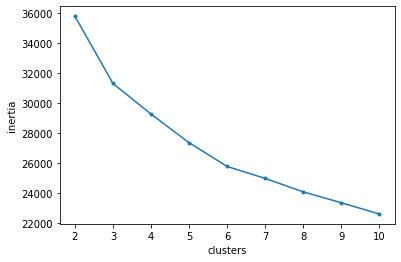

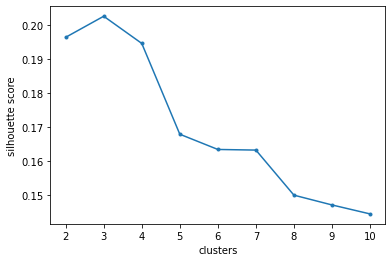

In [20]:
# Fit and evaluate KMeans models
inertias = []
sil_scores = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df_scaled)
  inertias.append(kmeans.inertia_)
  sil_scores.append(silhouette_score(df_scaled, kmeans.labels_))

plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')
plt.show()

plt.plot(range(2,11), sil_scores, marker = '.')
plt.xlabel('clusters')
plt.ylabel('silhouette score')
plt.show()

In [21]:
# Fit and evaluate tuned KMeans model
kmeans3 = KMeans(n_clusters=3)
df['cluster'] = kmeans3.fit_predict(df_scaled)
print(f"Inertia: {kmeans3.inertia_}")
print(f"Silhouette Score: {silhouette_score(df_scaled, kmeans3.labels_)}")

Inertia: 31328.605402190675
Silhouette Score: 0.2025307948224162


In [23]:
df.head()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied,cluster
0,26,3,2062,2,3,3,3,2,2,2,...,3,3,2,0,0,0,1,1,0,1
1,52,3,680,5,5,5,5,3,4,4,...,4,4,4,18,2,0,1,1,1,0
2,28,1,188,3,5,3,4,3,3,3,...,4,5,3,0,0,1,1,0,0,2
3,54,3,453,3,5,5,5,3,4,4,...,4,3,1,91,80,0,1,1,0,1
4,40,1,775,4,3,3,3,4,4,4,...,3,3,4,0,0,1,1,1,0,1


In [26]:
# Get mean values for each column by cluster
cluster_means = df.groupby('cluster').mean()
cluster_means

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
cluster,,,,,,,,,,,,,,,,,,,,,
0,42.728297,2.733869,1635.560249,3.178025,2.940788,3.027857,2.994947,3.635009,4.158590,4.130086,...,4.004924,3.690205,3.998575,3.865509,12.669215,12.795284,0.504924,0.926535,0.991060,0.995595
1,36.283189,1.948928,1029.175970,2.391062,2.594533,2.700933,2.991652,2.774922,2.586348,2.803896,...,3.196759,2.779669,3.200524,2.694713,16.459650,17.246685,0.474055,0.500737,0.999836,0.068260
2,38.573465,1.223068,787.375668,2.498623,3.657055,2.454722,2.921756,3.083590,2.787948,3.203791,...,3.569415,3.336303,3.612182,3.135752,14.261137,14.555484,0.489227,0.995788,0.000162,0.090718


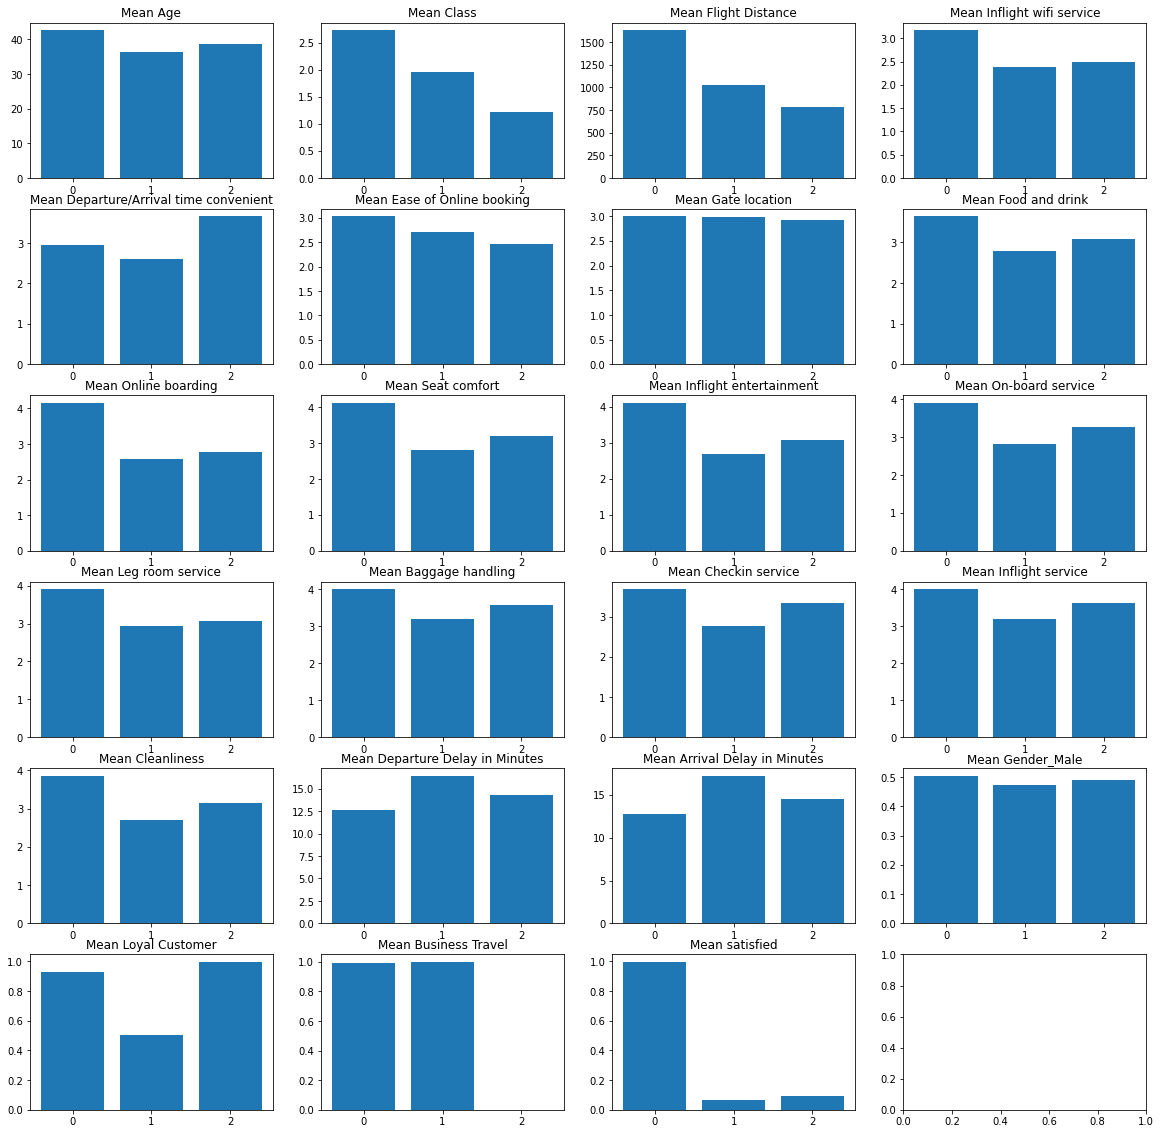

In [28]:
# Visualize means of each cluster
fig, axes = plt.subplots(6,4,figsize=(20,20))

axes = axes.ravel()

for i, col in enumerate(cluster_means.columns):
  axes[i].bar(cluster_means.index, cluster_means[col])
  axes[i].set_title(f"Mean {col}")
  axes[i].set_xticks([0,1,2])

Cluster 0 is the oldest, highest class, highest flight distance, and most satisfied group.

Clusters 1 and 2 are both low satisfaction groups, but cluster 1 has higher class, higher flight distance, less loyal, and higher business travel. Cluster 2, on the other hand, has no business travel.

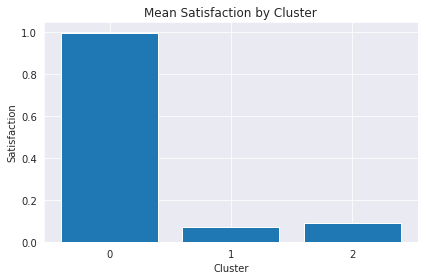

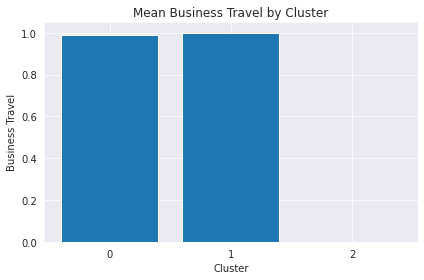

In [40]:
# Create 2 explanatory visualizations
sns.set_style('darkgrid')

plt.bar(data=cluster_means, x=cluster_means.index, height='satisfied')
plt.xlabel('Cluster')
plt.xticks([0,1,2])
plt.ylabel('Satisfaction')
plt.title('Mean Satisfaction by Cluster')
plt.tight_layout()
plt.show()
print('\n')

plt.bar(data=cluster_means, x=cluster_means.index, height='Business Travel')
plt.xlabel('Cluster')
plt.xticks([0,1,2])
plt.ylabel('Business Travel')
plt.title('Mean Business Travel by Cluster')
plt.tight_layout()
plt.show()

Figure 1. Cluster 0 is a high satisfaction group, while clusters 1 and 2 are both low satisfaction groups.

Figure 2. Clusters 0 and 1 are both high in businesss travel, while cluster 2 contains almost no business travel.

In [42]:
# Validation split
X = df.drop(columns='satisfied')
y = df['satisfied']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
X_train.head()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,cluster
5514,48,3,541,1,1,1,1,4,5,4,...,4,5,4,3,0,0,0,1,1,0
1266,26,1,862,1,1,1,1,1,3,3,...,1,3,5,3,146,135,1,0,1,1
5864,55,1,500,4,2,2,2,4,4,4,...,4,1,4,4,8,6,1,1,1,1
15865,38,1,984,4,4,4,1,1,4,1,...,2,2,2,1,92,75,1,0,1,1
12892,80,3,531,3,3,3,4,5,3,4,...,2,2,2,3,0,13,0,0,1,1


In [52]:
# Select columns for column transformer
num_cols = X_train.columns.drop('cluster')
cat_cols = ['cluster']

# Instantiate OHE
ohe = OneHotEncoder()

# Create tuples to match transformations to columns
num_tuple = (scaler, num_cols)
cat_tuple = (ohe, cat_cols)

# Instantiate column transformer
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder='drop')

In [53]:
# Instantiate PCA
pca = PCA(n_components=0.95)

# Instantiate final preprocessing pipeline
preprocessor = make_pipeline(col_transformer, pca)

# Fit and transform train and test sets
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [71]:
X_train.shape

(15000, 15)

PCA reduced the number of columns from 25 (including the 2 extra columns from one-hot encoding of 'cluster' column) to 15 while retaining 95% variance.

In [85]:
def evaluate(y_true, y_proba):
  """Evaluate a binary classification model"""
  y_preds = np.rint(y_proba)
  print(classification_report(y_true, y_preds))
  print(f"ROC AUC Score: {roc_auc_score(y_true, y_proba)}")
  ConfusionMatrixDisplay.from_predictions(y_true, y_preds, cmap='Blues')

In [60]:
# Learning history plotting function
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""
  
  metrics = history.history.keys()
  
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()


In [75]:
input_dim = X_train.shape[1]

# Create model 1
model = Sequential()
model.add(Dense(15, input_dim=input_dim, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model 1
model.compile(loss='bce', optimizer='adam', metrics=['accuracy',
                                                     metrics.Precision(),
                                                     metrics.Recall()])

Epoch 1/100
469/469 [==============================] - 5s 7ms/step - loss: 0.2970 - accuracy: 0.9069 - precision_3: 0.8895 - recall_3: 0.8971 - val_loss: 0.1612 - val_accuracy: 0.9550 - val_precision_3: 0.9979 - val_recall_3: 0.8969
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1488 - accuracy: 0.9566 - precision_3: 0.9938 - recall_3: 0.9058 - val_loss: 0.1386 - val_accuracy: 0.9588 - val_precision_3: 0.9949 - val_recall_3: 0.9085
Epoch 3/100
469/469 [==============================] - 1s 3ms/step - loss: 0.1276 - accuracy: 0.9595 - precision_3: 0.9915 - recall_3: 0.9145 - val_loss: 0.1197 - val_accuracy: 0.9588 - val_precision_3: 0.9939 - val_recall_3: 0.9095
Epoch 4/100
469/469 [==============================] - 1s 2ms/step - loss: 0.1135 - accuracy: 0.9619 - precision_3: 0.9888 - recall_3: 0.9227 - val_loss: 0.1102 - val_accuracy: 0.9610 - val_precision_3: 0.9890 - val_recall_3: 0.9193
Epoch 5/100
469/469 [==============================] - 1s 2ms/step -

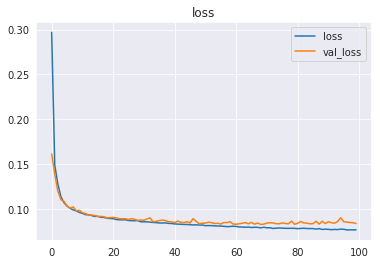

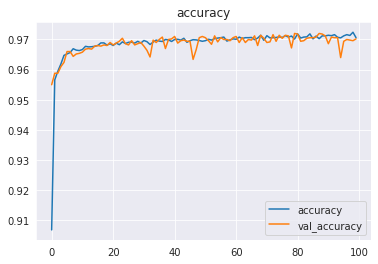

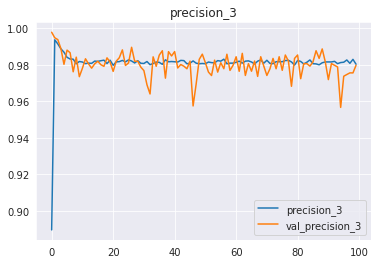

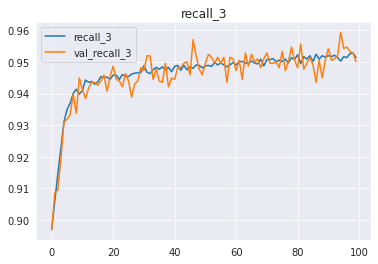

In [76]:
# Evaluate model 1
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100)

plot_history(history)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2857
           1       0.98      0.95      0.96      2143

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000

ROC AUC Score: 0.9941547240684478


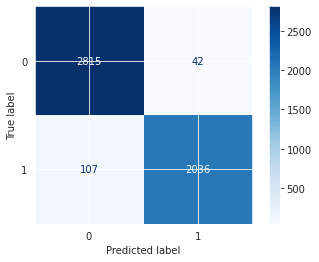

In [86]:
# Evaluate model 1
y_proba = model.predict(X_test)
evaluate(y_test, y_proba)

In [87]:
# Check class imbalances
df['satisfied'].value_counts(normalize=True)

0    0.56695
1    0.43305
Name: satisfied, dtype: float64

The model recommended for production use is model 1 since it shows the highest accuracy and f1-score. Since neither false negatives nor false positives are worse errors than one another in this case, the most important metrics are accuracy and f1-score. 

Model 1 shows an f1-score of 0.96 and an accuracy of 0.97, which is much higher than the target class imbalance of 0.56. 

Model 1 should work well in production, and be able to accurately predict satisfaction for 97% of people with a similar amount of false negatives and false positive errors.